# Analysis of Training Files

1. Do the test set and train set come from the same project?
2. How clean is the dataset? Is it script only? Is it coded by professionals with same style? Or mixed?

class based file?
def based file?

inline variable definition?

In [123]:
import os
import pandas as pd
import matplotlib as plt

# search training files
train_file_dir = 'train_files'
train_file_list = os.listdir(train_file_dir)

file_count = 0
for fp in train_file_list:
    if os.path.splitext(fp)[1].lower() != '.py':
        raise ValueError(f'unknown file! {fp}')
    file_count += 1

print(f'found {file_count} files')

df = pd.DataFrame(train_file_list, columns=[
    'filename'
])
df = df.reset_index()


found 10000 files


In [124]:
filenames = df['filename']
# load line count
non_empty_line_count = {}
is_init = {}
root_class_count = {}
root_function_count = {}

for fn in filenames:
    try:
        with open(os.path.join(train_file_dir, fn), 'r', encoding='utf-8', errors='ignore') as f :
            lines = f.readlines()
            lines = [l.strip('\n') for l in lines]
            lines = [l for l in lines if len(l.strip()) > 0]
            non_empty_line_count[fn] = len(lines)

            curr_is_init = '__init__.py' == fn[-1 * len('__init__.py'):]
            is_init[fn] = curr_is_init

            curr_root_class_count = len([l for l in lines if l[:len('class')] == 'class'])
            root_class_count[fn] = curr_root_class_count

            curr_root_function_count = len([l for l in lines if l[:len('def')] == 'def'])
            root_function_count[fn] = curr_root_function_count

    except Exception as e:
        print(fn)
        raise e

df['non_empty_line_count'] = non_empty_line_count.values()
df['is_init'] = is_init.values()
df['root_class_count'] = root_class_count.values()
df['root_function_count'] = root_function_count.values()

In [125]:
df.head()

# check imports

# check class?

# check

,index,filename,non_empty_line_count,is_init,root_class_count,root_function_count
0,0,data_Rochester-NRT_RocAlphaGo_tests_test_polic...,85,False,2,0
1,1,data_pydanny_django-profiletools_docs_conf.py,177,False,0,0
2,2,data_kennethreitz_tablib_tablib_formats__xlsx.py,109,False,0,6
3,3,data_openstack_group-based-policy_gbpservice_n...,168,False,1,0
4,4,data_Emsu_prophet_examples_quickstart.py,33,False,1,0


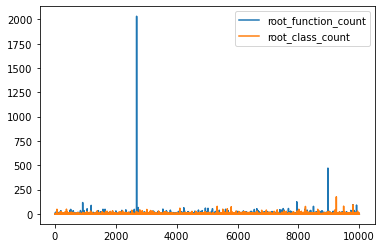

In [126]:
df[['root_function_count', 'root_class_count']].plot()


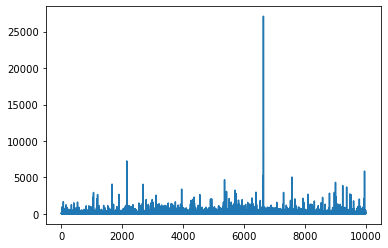

In [127]:
df['non_empty_line_count'].plot()

In [129]:
df.loc[df['non_empty_line_count'].idxmax()]

index                                                                6640
filename                data_openstack_proliantutils_proliantutils_tes...
non_empty_line_count                                                27112
is_init                                                             False
root_class_count                                                        0
root_function_count                                                     0
Name: 6640, dtype: object